# Project: TMDb Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I'll be analysing The TMDb Dataset. This data set contains information about 10,000 movies collected from
The Movie Database (TMDb), from 1960 - 2015


#### We'll be providing answers to the following questions using the TMDb data
<ul>
<li><a href="#pop">Which Movie has highest popularity </a></li>
<li><a href="#pop_">Top 10 popular movie</a></li>
<li><a href="#prop">What kinds of properties are associated with movie with highest popularity movie.</a></li>
<li><a href="#director">Top 10 Movie Director</a></li>
<li><a href="#top_director">Top 5 Movie Production Company</a></li>
<li><a href="#year_release">Which year has highest number of movie released</a></li>
<li><a href="#revenue">Movie with highest Revenue</a></li>
<li><a href="#budget">Movie with highest Budget</a></li>
<li><a href="#loss">The movies with highest loss</a></li>
<li><a href="#bud_rev">Does budget affect revenue</a></li> 
</ul>



In [1]:
#Import packages for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load our data into notebook
df = pd.read_csv("tmdb-movies.csv")

In [3]:
#view the first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Functions

In [4]:
#function to plot bar chart
def barplot(x):
    return x.plot(kind="barh", figsize=(6,6))

#function to check missing values
def missing(x):
    return x.isnull().sum()

#function to checkf for duplicate
def duplicate(x):
    return x.duplicated().sum()

#function to plot histogram chart
def histogramplot(x):
    return x.hist(figsize = (12, 12));

<a id='wrangling'></a>
## Data Wrangling

In [5]:
#veiw the shape of the data 
print(f"The data has {df.shape[0]} rows, and {df.shape[1]} columns")

The data has 10866 rows, and 21 columns


In [6]:
#View the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


#### Based on my research questions, I'll be dropping some columns that are irrelevant

In [7]:
#drop irrelevant columns
df.drop(columns = ['id', 'runtime', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'budget_adj', 'revenue_adj'], inplace =True)

In [8]:
#since there's no any other column with tittle, I'll rename 'original_title' to 'title' for easy accessibility
df.rename(columns = {'original_title': 'title'}, inplace=True)

In [9]:
#view first row to see if the colums have been effected
df.head(1)

,popularity,budget,revenue,title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


#### The changes I made so far has been effected

In [10]:
#check the new shape after dropping and renaming columns
df.shape

(10866, 12)

#### The previous column before was 21, now I've dropped 9 columns, left with 12 columns to work with

In [11]:
#check for duplicates
duplicate(df)

1

#### I have one duplicate, so I'll be dropping it in the next cell

In [12]:
#drop the duplicate
df.drop_duplicates(inplace=True)

In [13]:
#recheck for duplicated after dropping
duplicate(df)

0

#### We have no more duplicate

In [14]:
#check for missing values
missing(df)

popularity                 0
budget                     0
revenue                    0
title                      0
cast                      76
director                  44
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

#### We have several missing values. I'll be investigating the rows with missing values to know what should be done

In [15]:
#Investigate director rows with missing values
df[df['director'].isnull()]

,popularity,budget,revenue,title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
532,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015
548,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015
556,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015
1032,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014
1054,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,TV Movie|Documentary,NaN,1/19/14,11,7.2,2014
1203,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,NaN,Documentary,Valve,3/19/14,40,7.0,2014
1241,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014
1288,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,Documentary,2 Entertain Video,11/17/14,12,6.8,2014
1852,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,Drama,Darlow Smithson Productions|British Broadcasti...,1/9/09,19,7.5,2009
1872,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,NaN,Drama|Family|Foreign,A B Corp,12/4/09,11,6.1,2009


#### After investigating the director's rows with missing values, I discovered that almost all the budget and revenue has zero values, and production_companies has plenty missing values as well. 
#### Based on this Findings, the best thing is to drop the rows. 

In [16]:
#Investigate cast rows with missing values
df[df['cast'].isnull()]

,popularity,budget,revenue,title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
371,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015
441,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015
465,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,Documentary,BBC,1/24/15,19,7.8,2015
536,0.122543,0,0,A Faster Horse,NaN,David Gelb,Documentary,NaN,10/8/15,12,8.0,2015
538,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,Documentary,NaN,1/1/15,11,8.9,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
9677,0.253376,0,0,Red's Dream,NaN,John Lasseter,Animation,Pixar Animation Studios,8/17/87,44,6.6,1987
9755,0.046272,0,0,The Big Shave,NaN,Martin Scorsese,Drama,NaN,1/1/68,12,6.7,1968
10434,0.146906,200,0,Six Men Getting Sick,NaN,David Lynch,Animation,Pensylvania Academy of Fine Arts,1/1/67,16,5.2,1967
10550,0.306425,0,0,Luxo Jr.,NaN,John Lasseter,Animation|Family,Pixar Animation Studios,8/17/86,81,7.3,1986


#### Cast rows with missing values has almost thesame issues with director. I'll be dropping the rows too

In [17]:
#Investigate genres rows with missing values
df[df['genres'].isnull()]

,popularity,budget,revenue,title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
424,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,NaN,NaN,10/29/15,21,6.1,2015
620,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,NaN,NaN,10/3/14,13,6.8,2014
1712,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,NaN,NaN,2/27/09,11,7.0,2009
2370,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,Michael Scott,NaN,NaN,6/5/10,12,5.8,2010
2376,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,12/25/10,11,7.7,2010
2853,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,YÄ±lmaz ErdoÄŸan,NaN,NaN,2/2/01,12,7.2,2001
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,Kim Jin-Yeong,NaN,NaN,8/13/08,11,6.1,2008
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,Danny Boyle,NaN,BBC,7/27/12,12,8.3,2012


#### There's also no record for budget and revenue columns of genres with missing values. I'll be dropping this columns as well

In [18]:
#Investigate production_companies rows with missing values
df[df['production_companies'].isnull()]

,popularity,budget,revenue,title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
228,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,Adventure|Documentary,NaN,1/24/15,36,7.8,2015
259,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,TV Movie,NaN,11/27/15,10,7.6,2015
295,0.417191,0,0,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,Family|TV Movie,NaN,11/26/15,12,6.3,2015
298,0.370258,0,0,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015
328,0.367617,0,0,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
10804,0.149259,0,0,Interiors,Diane Keaton|Kristin Griffith|Mary Beth Hurt|R...,Woody Allen,Drama,NaN,8/2/78,35,6.3,1978
10806,0.138635,0,0,Gates of Heaven,Lucille Billingsley|Zella Graham|Cal Harberts|...,Errol Morris,Documentary,NaN,10/1/78,12,5.9,1978
10816,0.064602,0,0,The Rutles: All You Need Is Cash,Eric Idle|John Halsey|Ricky Fataar|Neil Innes|...,Eric Idle|Gary Weis,Comedy,NaN,3/22/78,14,6.0,1978
10842,0.253437,0,0,Winnie the Pooh and the Honey Tree,Sterling Holloway|Junius Matthews|Sebastian Ca...,Wolfgang Reitherman,Animation|Family,NaN,1/1/66,12,7.9,1966


#### The budget and revenue has zeros as well, I would have said I should drop it, but 1,030 is a whole lot of values. It will affect other other columns. I'll be replacing the missing values with 'Missing'.

### Drop & Replace the missing values

In [19]:
#drop the missing value in genres, director, and cast
df.dropna(subset= ['genres', 'director', 'cast'], inplace=True)
#replace nan in production_companies with "Missing"
df.production_companies.fillna("Missing", inplace=True)


In [20]:
#check if missing values has been effected
missing(df)

popularity              0
budget                  0
revenue                 0
title                   0
cast                    0
director                0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [21]:
#Check shape after dropping the missing rows
df.shape

(10731, 12)

#### The previous rows before was 10866, now I've dropped 134 rows, left with 10732 rows to work with. All my columns are clean

In [22]:
#View the statistical values of numeric columns in our dataset
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year
count,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000
mean,0.652615,1.480365e+07,4.031989e+07,219.812972,5.964710,2001.259622
std,1.004804,3.106456e+07,1.176524e+08,578.815324,0.930283,12.820151
min,0.000188,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000
25%,0.210765,0.000000e+00,0.000000e+00,17.000000,5.400000,1995.000000
50%,0.387081,0.000000e+00,0.000000e+00,39.000000,6.000000,2006.000000
75%,0.720889,1.600000e+07,2.500000e+07,148.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000


In [23]:
#check for inconsistent data type
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
title                    object
cast                     object
director                 object
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [24]:
df.head(1)

,popularity,budget,revenue,title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


#### release_date has object type instead of datetime type. I'll convert it to datetime type

In [25]:
#convert release_date odject type to datetime
df.release_date = pd.to_datetime(df.release_date)

In [26]:
#recheck if modified
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
title                           object
cast                            object
director                        object
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

#### The change has been effected

In [27]:
#view the first 2 rows of the data
df.head(2)

,popularity,budget,revenue,title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


<a id='eda'></a>
## Exploratory Data Analysis

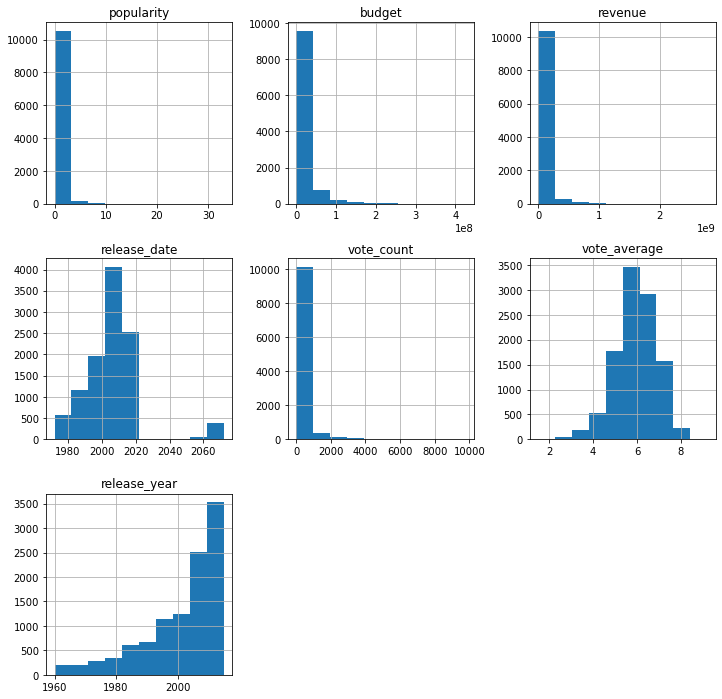

In [28]:
#Histogram quick plot of the data
histogramplot(df);

#### The release_date chart shows an abnomality in the date. The release year is from 1960 - 2015. And the plot is showing us we have from year 2040 upward in the data.
<br>
Check what the problem is

In [29]:
#check the begining and the end of the release year
df.release_year.min(), df.release_year.max()

(1960, 2015)

In [30]:
#Check the data with date greater than year 2015
mask = df['release_date'] > '2015-12-31'
mask = df.loc[mask]

In [31]:
#view release_date column and release_year column to see the difference
mask[['release_date', 'release_year']].head()

,release_date,release_year
9719,2068-04-05,1968
9720,2068-02-07,1968
9721,2068-10-01,1968
9722,2068-10-08,1968
9723,2068-10-10,1968


#### There's an error in the first 2 numbers of year. We can say that the release_year is the correct year
#### We have to replace the year in release_date with release_year

In [32]:
#check the size of the abnormal year
mask.shape

(453, 12)

#### I have 457 rows that are affected by the wrong release_date year

In [33]:
#replace the year in release_date with release_year, then put the new date to a new column, 'new_release_date'
df['new_release_date'] = df.apply(lambda x : x.release_date.replace(year=x.release_year),axis=1)

#Drop the 'release_date', since I have a corrected 'release_date' as 'new_release_date'
df.drop(columns = 'release_date', inplace=True)

In [34]:
df.head(2)

,popularity,budget,revenue,title,cast,director,genres,production_companies,vote_count,vote_average,release_year,new_release_date
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,2015-06-09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,2015-05-13


#### Perform hist plot again to view

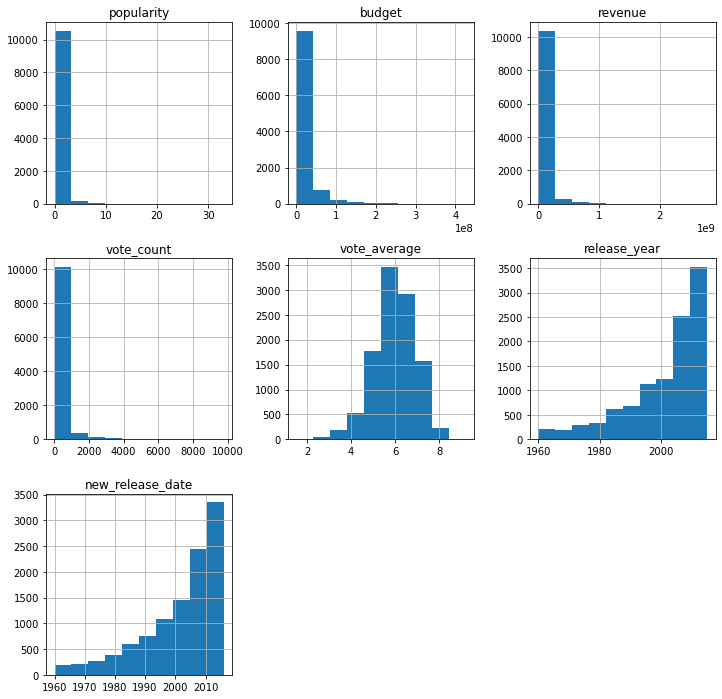

In [35]:
#perform a quick plot on the numeric data
histogramplot(df);

#### The historam plot is clean

In [36]:
df.head(2)

,popularity,budget,revenue,title,cast,director,genres,production_companies,vote_count,vote_average,release_year,new_release_date
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,2015-06-09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,2015-05-13


<a id='pop'></a>
# Question 1
### Which Movie has highest popularity?

In [37]:
#Get the maximum popularity number by using .max() function
pop = df['popularity'].max()
pop

32.985763

In [38]:
print(f"The Movie titled: [{df.title[df.popularity == pop].values[0]}], has the highest popularity with [{pop}]")

The Movie titled: [Jurassic World], has the highest popularity with [32.985763]


<a id='pop_'></a>
# Question 2
## Top 10 popular movie

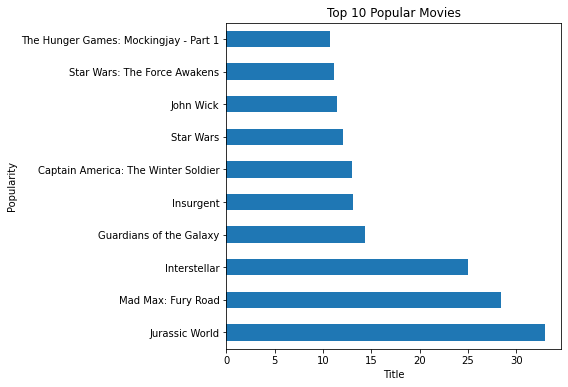

In [39]:
#get the top 10 movies with highest popularity and visualize it
ax = df.groupby('title')['popularity'].sum().sort_values(ascending=False)[:10];
ax = barplot(ax)
ax.set_title("Top 10 Popular Movies")
ax.set_xlabel("Title")
ax.set_ylabel("Popularity");

#### The plot shows the list of Top 10 Popular Movies. Starting from Jurassic World(The most popular movie), Mad Max: Fury Road, Interstellar and others

<a id='prop'></a>
# Question 3
###  What kinds of properties are associated with movie with highest popularity movie?

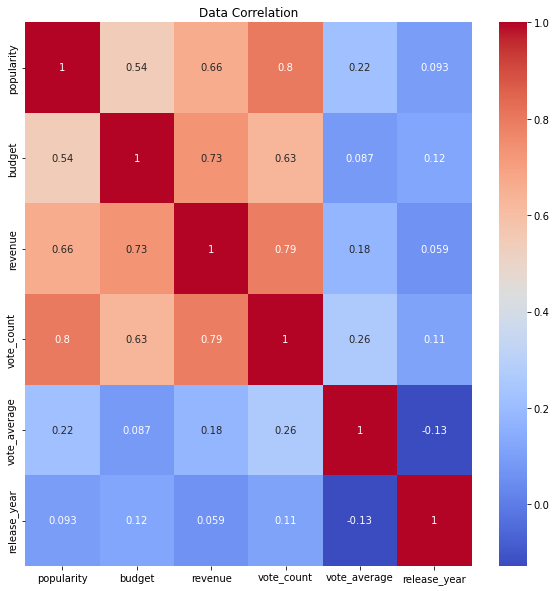

In [40]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
plt.figure (figsize=(10,10))
ax = sns.heatmap(corr, annot = True, cmap = "coolwarm")
ax.set_title("Data Correlation");

#### From the heatmap correlation, the number of votes, and revenue generated strongly influenced the popularity of the top movies.
#### Budget is in a average. High budget doesn't necessary mean a movie will be popular, but it does have a positive influence.


<a id='director'></a>
# Question 4
## Top 10 Movie Director

In [41]:
#get the number of the directors in the data
df.director.nunique()

5018

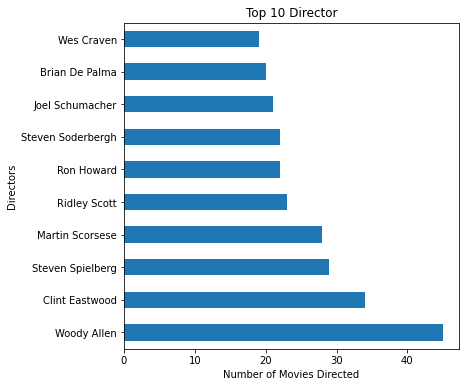

In [42]:
#Get the top 10 Director based on number of movies directed
ax = df.director.value_counts()[:10].sort_values(ascending=False)
ax = barplot(ax)
ax.set_title("Top 10 Director")
ax.set_xlabel("Number of Movies Directed")
ax.set_ylabel("Directors");

#### The plot shows the Top 10 Director starting from Woody Allen (the top director), Clint Eastwook, Steven Spielberg, and others

<a id='top_director'></a>
# Question 5
## Top 5 Movie Production Company

In [43]:
df.head(1)

,popularity,budget,revenue,title,cast,director,genres,production_companies,vote_count,vote_average,release_year,new_release_date
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,2015-06-09


In [44]:
#check how many rows has "|"
df[df["production_companies"].str.contains('|')].shape[0]

10731

##### We have more than one companies that produced a movie and they're separated by " | ", and all rows are affected

I'll split the companies and pass them to a new dataframe for easy count

In [45]:
#split the companies and pass them into a new dataframe
prod_comp = pd.DataFrame(df['production_companies'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
prod_comp

Missing                                   959
Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
                                         ... 
Harbour Productions Limited                 1
Harbour Pictures                            1
Harbor Picture Company                      1
Harbor Light Entertainment                  1
í”„ë¡œë•ì…˜M                                1
Length: 7843, dtype: int64

In [46]:
#get the top 5 movie production Company based on the number of movies produced
#I removed the index 0 being the missing values
prod_comp[1:6]

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
dtype: int64

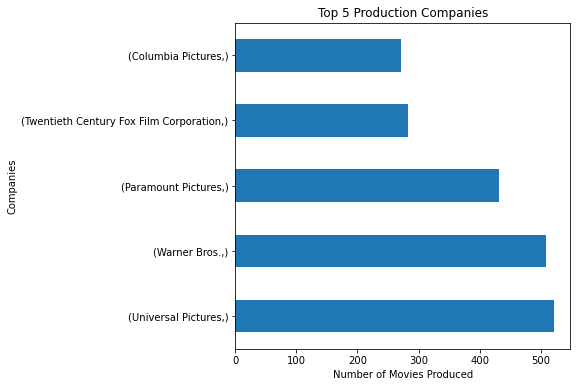

In [47]:
#plot bar chart for the Top 5 Movie Production Companies based on numbers of the movies produced
ax =prod_comp[1:6]
ax = barplot(ax)
ax.set_title("Top 5 Production Companies")
ax.set_xlabel("Number of Movies Produced")
ax.set_ylabel("Companies");

 #### This plot shows the Top 5 Production Companies, starting from Univresal Pictures (the top production company), Warner Bros., Paramount Pictures, and others

<a id='year_release'></a>
# Question 6
## Which year has highest number of movies released

In [48]:
#Perform value count on the year and how many movies released. It automatically sort it from highest to the lowest
#Get the Top 1
top_year = df.release_year.value_counts()[:1]

In [49]:
print(f"The year [{top_year.index[0]}] has the highest number of movies released, with [{top_year.iloc[0]}] movies")

The year [2014] has the highest number of movies released, with [682] movies


<a id='revenue'></a>
# Question 7
## Movie with highest Revenue

In [50]:
#Get the highest revenue with .max() function
highest_rev = df.revenue.max()
print(f"Movie [{df.title[df.revenue == highest_rev ].values[0]}] has the highest revenue with [${highest_rev}]")

Movie [Avatar] has the highest revenue with [$2781505847]


<a id='budget'></a>
# Question 8
## Movie with highest Budget

In [51]:
#Get the highest budget with .max() function
highest_budg = df.budget.max()
print(f"Movie [{df.title[df.budget == highest_budg ].values[0]}] has the highest budget 0f [${highest_budg}]")

Movie [The Warrior's Way] has the highest budget 0f [$425000000]


<a id='loss'></a>
# Question 9
## The movies with highest loss


In [52]:
#Get the difference between revenue and budget, then create a new column for the result, named 'profit'
df['profit'] = df.revenue - df.budget

In [53]:
#get the value of the lowest price with .min() function
df.profit.min()

-413912431

In [54]:
#The movie with highest loss
print(f"The movie [{df.title[df.profit == -413912431].values[0]}] has the highest loss with [${-413912431}]")
print(f"It's budget is [${df.budget[df.profit == -413912431].values[0]}], and the revenue is [${df.revenue[df.profit == -413912431].values[0]}]")
print("That's a huge loss")

The movie [The Warrior's Way] has the highest loss with [$-413912431]
It's budget is [$425000000], and the revenue is [$11087569]
That's a huge loss


<a id='bud_rev'></a>
# Question 10
## Does budget affect revenue?

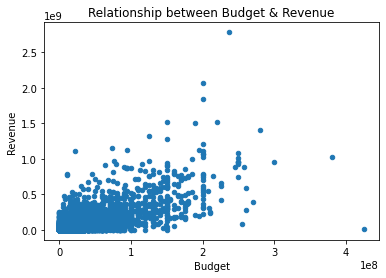

In [55]:
#scattered plot of budget agains revenue
ax = df.plot(kind='scatter', x = 'budget', y ='revenue');
ax.set_title("Relationship between Budget & Revenue")
ax.set_xlabel("Budget")
ax.set_ylabel("Revenue");

We can see from this visual that the relatioship between budget and revenue is positive
<br>We can say that high budget in a way affects revenue positively

<a id='conclusions'></a>
## Conclusion

1. The Movie titled: <b>Jurassic World</b>, has the highest popularity with <b>32.985763</b>
<br>
<br>
2. The top 10 popular movies are 
<br>
<ul>
    <li>Jurassic World</li>
    <li>Mad Max: Fury Road</li>
    <li>Interstellar</li>
    <li>Guardians of the Galaxy</li>
    <li>Insurgent </li>
    <li>Captain America: The Winter Soldier</li>
    <li>Star Wars </li>
    <li>John Wick</li>
    <li>Star Wars : The Force Awakens</li>
    <li>The Hunger Games: Mockingjay - Part 1</li>
</ul>
<br>
3. The number of votes, and revenue generated strongly influenced the popularity of the top movies. Budget is in a average. So high budget doesn't necessary mean a movie will be popular, but it does have a positive influence.
<br>
<br>
4. These are the list of Top 10 Directors
<ul>
    <li>Woody Allen</li>
    <li>Clint Eastwood</li>
    <li>Steven Spielberg</li>
    <li>Martin Scorsese</li>
    <li>Ridley Scott</li>
    <li>Ron Howard</li>
    <li>Steven Soderbergh</li>
    <li>Joel Schumacher</li>
    <li>Brian De Palma</li>
    <li>Wes Craven</li>
</ul>
<br>
5. Top 5 Movie Production Companies
<ul>
    <li>Universal Pictures</li>
    <li>Warner Bros.</li>
    <li>Paramount Pictures</li>
    <li>Twentieth Century Fox Film Corporation</li>
    <li>Columbia Pictures </li>
</ul>
<br>
6. The year <b>2014</b> has the highest number of movies released, with <b>682</b> movies
<br><br>
7. Movie <b>Avatar</b> has the highest revenue with <b>$2781505847</b>
<br><br>

8. Movie <b>The Warrior's Way</b> has the highest budget 0f <b>$425000000]</b>
<br><br>

9. The movie <b>The Warrior's Way</b> has the highest loss with <b>$-413912431</b>. That's a huge loss
<br>
10. High budget in a way affects revenue positively

<a id='limitation'></a>
## Limitations

<ul>
    <li> The number of missing values in productions_companies too much which might have affected my analysis </li>
    <li> The omission of budget and revenue also limited my findings

#### Reference: 
stackoverflow.com